CONFIGURATION:
  Cleaned dataset: 350 normal + 490 abnormal = 840 total
  Original dataset: 3000 images
  Unique ratio: 0.280 (28.0%)
  Near-duplicate ratio: 0.720 (72.0%)
PERFECT CONTROLLED EXPERIMENTS
1. Original (3000 images, 72% near-duplicates)
2. Cleaned (350N + 490A, 0% duplicates)
3. Perfect Controlled (350N + 490A, 72% near-duplicates)
All experiments: 15 epochs, LR=0.001

Dataset Paths:
Original: /content/drive/MyDrive/data validty/original_dataset
Cleaned: /content/drive/MyDrive/data validty/cleaned_dataset

Creating perfect size-controlled dataset...
Target: 350 normal + 490 abnormal = 840 total
Unique: 28.0%
Near-duplicates: 72.0%

Final count: 350 normal + 490 abnormal = 840 total
Unique images: 840 (100.0%)
Near-duplicates: 605 (72.0%)
Perfect match to cleaned dataset distribution


EXPERIMENT: ORIGINAL (3000 images, 72% near-dup)
Dataset: 1500 normal, 1500 abnormal, 3000 total
Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Training: 2

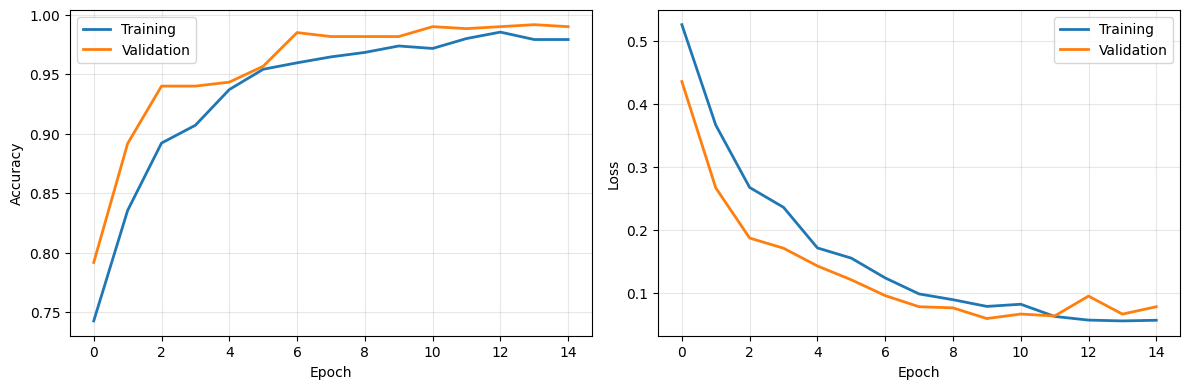

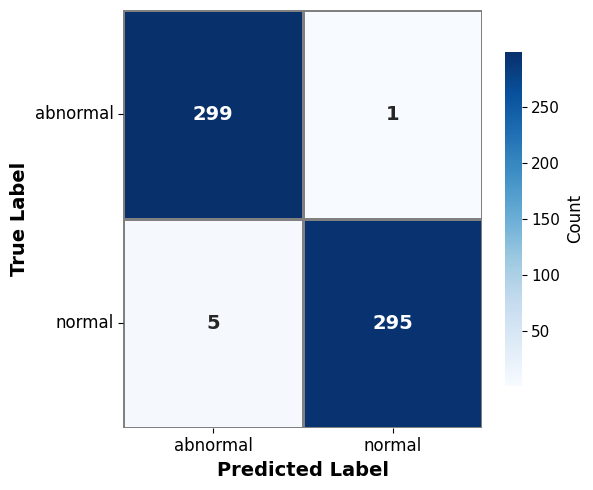



EXPERIMENT: CLEANED (350N + 490A, 0% dup)
Dataset: 350 normal, 490 abnormal, 840 total
Found 672 images belonging to 2 classes.
Found 168 images belonging to 2 classes.
Training: 672, Testing: 168
Epoch 1/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 231ms/step - accuracy: 0.6180 - loss: 0.6524 - val_accuracy: 0.7619 - val_loss: 0.5285
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - accuracy: 0.7625 - loss: 0.5618 - val_accuracy: 0.7738 - val_loss: 0.4665
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - accuracy: 0.7827 - loss: 0.4754 - val_accuracy: 0.7679 - val_loss: 0.5284
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step - accuracy: 0.7892 - loss: 0.4764 - val_accuracy: 0.7738 - val_loss: 0.4253
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step - accuracy: 0.8356 - loss: 0.3808 - val_accuracy: 0.8155 - val_loss: 0.3957
Epoch 6/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step - accuracy: 0.8407 - loss: 0.3840 - val_accuracy: 0.8571 - val_loss: 0.3524
Epoch 7/15
21/21 ━━━━━━━━━━━━━━━━

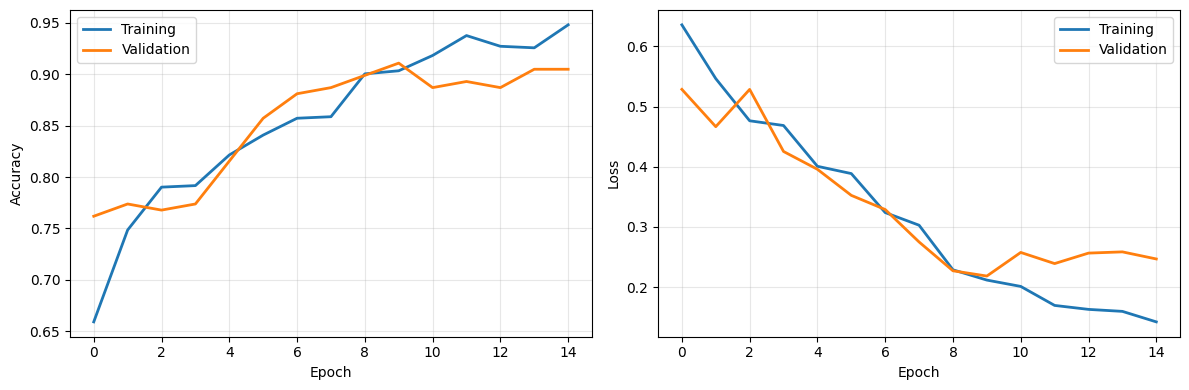

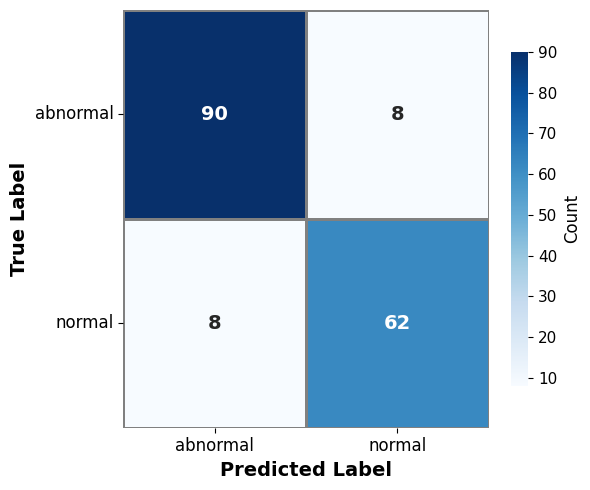



EXPERIMENT: PERFECT CONTROLLED (350N + 490A, 72% near-dup)
Dataset: 350 normal, 490 abnormal, 840 total
Found 672 images belonging to 2 classes.
Found 168 images belonging to 2 classes.
Training: 672, Testing: 168
Epoch 1/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.6236 - loss: 0.6338 - val_accuracy: 0.7976 - val_loss: 0.4770
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.7457 - loss: 0.5507 - val_accuracy: 0.7917 - val_loss: 0.4602
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.7829 - loss: 0.4655 - val_accuracy: 0.8631 - val_loss: 0.3193
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.8154 - loss: 0.4053 - val_accuracy: 0.8929 - val_loss: 0.2921
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.8659 - loss: 0.2965 - val_accuracy: 0.9583 - val_loss: 0.1863
Epoch 6/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9073 - loss: 0.2347 - val_accuracy: 0.9583 - val_loss: 0.1167
Epoch 7/15
21/21

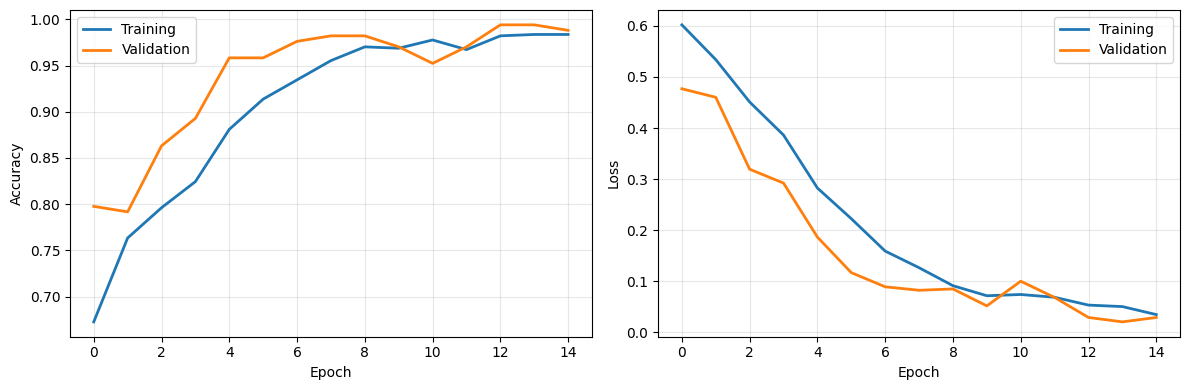

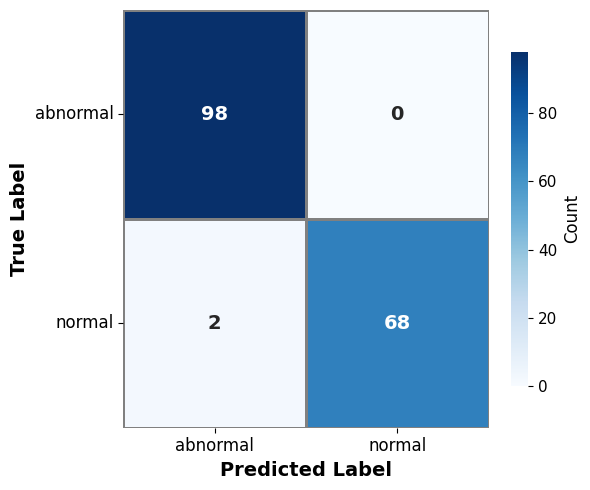


FINAL RESULTS

Dataset                                  Images             Accuracy   Precision  Recall     F1-Score  
----------------------------------------------------------------------------------------------------
original                                 1500N + 1500A      0.9900    0.9901     0.9900     0.9900
cleaned                                  350N + 490A        0.9048    0.9048     0.9048     0.9048
perfect_controlled                       350N + 490A        0.9881    0.9883     0.9881     0.9881

FINDINGS:
Near-duplicate effect: 0.0833 (8.33%)
Dataset size effect: 0.0019 (0.19%)
Total performance inflation: 0.0852 (8.52%)

CONCLUSION:
Near-duplicates contribute: 8.33%
Dataset size contributes: 0.19%

Experiment completed successfully!


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
import shutil
import random
import cv2

# ======================
# Suppress all warnings
# ======================
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel('ERROR')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# ======================
# COMPREHENSIVE RANDOM SEED FIX FOR GPU
# ======================

def set_all_seeds(seed=42):
    """Set all random seeds for complete reproducibility with GPU"""
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

    tf.config.experimental.enable_op_determinism()

    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(f"GPU configuration error: {e}")

set_all_seeds(42)

# ======================
# CONFIGURATION
# ======================

TARGET_NORMAL = 350
TARGET_ABNORMAL = 490
TARGET_TOTAL = TARGET_NORMAL + TARGET_ABNORMAL

ORIGINAL_TOTAL = 3000
UNIQUE_RATIO = TARGET_TOTAL / ORIGINAL_TOTAL
DUPLICATE_RATIO = 1 - UNIQUE_RATIO

FIXED_EPOCHS = 15
FIXED_LEARNING_RATE = 0.001
IMAGE_SIZE = (224, 224)

print("CONFIGURATION:")
print(f"  Cleaned dataset: {TARGET_NORMAL} normal + {TARGET_ABNORMAL} abnormal = {TARGET_TOTAL} total")
print(f"  Original dataset: 3000 images")
print(f"  Unique ratio: {UNIQUE_RATIO:.3f} ({UNIQUE_RATIO*100:.1f}%)")
print(f"  Near-duplicate ratio: {DUPLICATE_RATIO:.3f} ({DUPLICATE_RATIO*100:.1f}%)")

# ======================
# MODEL CREATION
# ======================

def create_tiny_cnn(input_shape=(224, 224, 3), num_classes=2):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(25, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(10, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=FIXED_LEARNING_RATE)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ======================
# DATA GENERATORS
# ======================

def create_deterministic_generators(dataset_path):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_generator = datagen.flow_from_directory(
        directory=dataset_path,
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode='categorical',
        subset='training',
        shuffle=True,
        seed=42
    )

    test_generator = datagen.flow_from_directory(
        directory=dataset_path,
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode='categorical',
        subset='validation',
        shuffle=False,
        seed=42
    )

    return train_generator, test_generator

# ======================
# VISUALIZATION FUNCTIONS
# ======================

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(history.history['accuracy'], linewidth=2, label='Training')
    ax1.plot(history.history['val_accuracy'], linewidth=2, label='Validation')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    ax2.plot(history.history['loss'], linewidth=2, label='Training')
    ax2.plot(history.history['val_loss'], linewidth=2, label='Validation')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))

    # Create a custom colormap with better contrast
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Count', 'shrink': 0.8},
                annot_kws={'size': 14, 'weight': 'bold'},  # Larger, bolder annotation
                linewidths=2,  # Thicker cell borders
                linecolor='gray')  # Visible cell borders

    # Increase font sizes
    plt.ylabel('True Label', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12, rotation=0)
    plt.yticks(fontsize=12, rotation=0)

    # Adjust colorbar font
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=11)
    cbar.ax.set_ylabel('Count', fontsize=12, fontweight='normal')

    # Add value annotations in center of cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            # This centers the text better (already handled by sns.heatmap)
            pass

    plt.tight_layout()
    plt.show()

# ======================
# TRAINING AND EVALUATION
# ======================

def train_and_evaluate(dataset_path, experiment_name):
    print(f"\n{'='*60}")
    print(f"EXPERIMENT: {experiment_name}")
    print(f"{'='*60}")

    if not os.path.exists(dataset_path):
        print(f"Dataset path does not exist: {dataset_path}")
        return None

    normal_path = os.path.join(dataset_path, "normal")
    abnormal_path = os.path.join(dataset_path, "abnormal")

    if not os.path.exists(normal_path) or not os.path.exists(abnormal_path):
        print(f"Dataset structure incorrect: {dataset_path}")
        return None

    normal_count = len(os.listdir(normal_path))
    abnormal_count = len(os.listdir(abnormal_path))
    total_count = normal_count + abnormal_count

    print(f"Dataset: {normal_count} normal, {abnormal_count} abnormal, {total_count} total")

    train_generator, test_generator = create_deterministic_generators(dataset_path)
    print(f"Training: {train_generator.samples}, Testing: {test_generator.samples}")

    set_all_seeds(123)
    model = create_tiny_cnn()

    history = model.fit(
        train_generator,
        epochs=FIXED_EPOCHS,
        validation_data=test_generator,
        verbose=1,
        shuffle=False
    )

    tf.keras.backend.clear_session()
    set_all_seeds(123)

    test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)

    test_generator.reset()
    y_pred = model.predict(test_generator, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_generator.classes

    from sklearn.metrics import precision_score, recall_score, f1_score
    test_precision = precision_score(y_true, y_pred_classes, average='weighted')
    test_recall = recall_score(y_true, y_pred_classes, average='weighted')
    test_f1 = f1_score(y_true, y_pred_classes, average='weighted')

    print(f"\nRESULTS:")
    print(f"Accuracy:  {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall:    {test_recall:.4f}")
    print(f"F1-Score:  {test_f1:.4f}")

    print(f"\nClassification Report:")
    class_names = list(test_generator.class_indices.keys())
    report = classification_report(y_true, y_pred_classes, target_names=class_names, digits=4)
    print(report)

    plot_training_history(history)
    plot_confusion_matrix(y_true, y_pred_classes, class_names)

    del model
    tf.keras.backend.clear_session()

    return {
        'accuracy': test_accuracy,
        'precision': test_precision,
        'recall': test_recall,
        'f1': test_f1,
        'loss': test_loss,
        'train_samples': train_generator.samples,
        'test_samples': test_generator.samples,
        'total_images': total_count,
        'normal_images': normal_count,
        'abnormal_images': abnormal_count
    }

# ======================
# THREE NEAR-DUPLICATE TRANSFORMATIONS
# ======================

def create_intensity_adjustment(image_path, output_path):
    img = cv2.imread(image_path)
    if img is None:
        return False

    img_float = img.astype(np.float32)
    brightness = np.random.uniform(0.98, 1.02)
    contrast = np.random.uniform(-10, 10)

    img_adj = img_float * brightness + contrast
    img_adj = np.clip(img_adj, 0, 255).astype(np.uint8)

    cv2.imwrite(output_path, img_adj, [cv2.IMWRITE_JPEG_QUALITY, 95])
    return True

def create_scaling_adjustment(image_path, output_path):
    img = cv2.imread(image_path)
    if img is None:
        return False

    h, w = img.shape[:2]
    scale = np.random.uniform(0.97, 1.03)
    new_h, new_w = int(h * scale), int(w * scale)

    if scale < 1.0:
        interpolation = cv2.INTER_AREA
    else:
        interpolation = cv2.INTER_LINEAR

    img_scaled = cv2.resize(img, (new_w, new_h), interpolation=interpolation)

    if new_h > h or new_w > w:
        start_h = max(0, (new_h - h) // 2)
        start_w = max(0, (new_w - w) // 2)
        img_scaled = img_scaled[start_h:start_h+h, start_w:start_w+w]
    elif new_h < h or new_w < w:
        pad_h, pad_w = max(0, h - new_h), max(0, w - new_w)
        top, left = pad_h // 2, pad_w // 2
        bottom, right = pad_h - top, pad_w - left
        img_scaled = cv2.copyMakeBorder(img_scaled, top, bottom, left, right,
                                      cv2.BORDER_CONSTANT, value=[0, 0, 0])

    if img_scaled.shape[0] != h or img_scaled.shape[1] != w:
        img_scaled = cv2.resize(img_scaled, (w, h), interpolation=cv2.INTER_LINEAR)

    cv2.imwrite(output_path, img_scaled, [cv2.IMWRITE_JPEG_QUALITY, 95])
    return True

def create_rotation_adjustment(image_path, output_path):
    img = cv2.imread(image_path)
    if img is None:
        return False

    h, w = img.shape[:2]
    angle = np.random.uniform(-3, 3)
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    img_rotated = cv2.warpAffine(img, rotation_matrix, (w, h),
                                 flags=cv2.INTER_LINEAR,
                                 borderMode=cv2.BORDER_REPLICATE)

    cv2.imwrite(output_path, img_rotated, [cv2.IMWRITE_JPEG_QUALITY, 95])
    return True

# ======================
# PERFECT SIZE-CONTROLLED DATASET CREATION
# ======================

def create_perfect_controlled_dataset(cleaned_path, output_path):
    print(f"\nCreating perfect size-controlled dataset...")
    print(f"Target: {TARGET_NORMAL} normal + {TARGET_ABNORMAL} abnormal = {TARGET_TOTAL} total")
    print(f"Unique: {UNIQUE_RATIO*100:.1f}%")
    print(f"Near-duplicates: {DUPLICATE_RATIO*100:.1f}%")

    if os.path.exists(output_path):
        shutil.rmtree(output_path)

    os.makedirs(os.path.join(output_path, "normal"))
    os.makedirs(os.path.join(output_path, "abnormal"))

    cleaned_normal = os.listdir(os.path.join(cleaned_path, "normal"))
    cleaned_abnormal = os.listdir(os.path.join(cleaned_path, "abnormal"))

    cleaned_normal.sort()
    cleaned_abnormal.sort()

    total_unique_needed = int(TARGET_TOTAL * UNIQUE_RATIO)
    unique_normal = int(total_unique_needed * (TARGET_NORMAL / TARGET_TOTAL))
    unique_abnormal = total_unique_needed - unique_normal

    total_near_duplicates_needed = int(TARGET_TOTAL * DUPLICATE_RATIO)
    near_duplicates_normal = TARGET_NORMAL - unique_normal
    near_duplicates_abnormal = TARGET_ABNORMAL - unique_abnormal

    random.seed(123)
    np.random.seed(123)

    # NORMAL CLASS
    selected_unique_normal = random.sample(cleaned_normal, min(unique_normal, len(cleaned_normal)))
    normal_unique_sources = []

    for i, img in enumerate(selected_unique_normal):
        src = os.path.join(cleaned_path, "normal", img)
        dst = os.path.join(output_path, "normal", f"unique_n_{i:03d}_{img}")
        shutil.copy2(src, dst)
        normal_unique_sources.append((src, f"unique_n_{i:03d}_{img}"))

    transformation_functions = [create_intensity_adjustment, create_scaling_adjustment, create_rotation_adjustment]
    transformation_names = ["intensity", "scaling", "rotation"]

    near_dups_per_unique = near_duplicates_normal // len(normal_unique_sources)
    remainder = near_duplicates_normal % len(normal_unique_sources)
    near_dup_count = 0

    for idx, (src_path, unique_name) in enumerate(normal_unique_sources):
        num_for_this_image = near_dups_per_unique + (1 if idx < remainder else 0)

        for dup_num in range(num_for_this_image):
            if near_dup_count >= near_duplicates_normal:
                break

            transform_idx = near_dup_count % 3
            transform_func = transformation_functions[transform_idx]
            transform_name = transformation_names[transform_idx]

            dst_filename = f"near_dup_n_{near_dup_count:03d}_{transform_name}_{unique_name}"
            dst_path = os.path.join(output_path, "normal", dst_filename)
            transform_func(src_path, dst_path)
            near_dup_count += 1

    # ABNORMAL CLASS
    selected_unique_abnormal = random.sample(cleaned_abnormal, min(unique_abnormal, len(cleaned_abnormal)))
    abnormal_unique_sources = []

    for i, img in enumerate(selected_unique_abnormal):
        src = os.path.join(cleaned_path, "abnormal", img)
        dst = os.path.join(output_path, "abnormal", f"unique_a_{i:03d}_{img}")
        shutil.copy2(src, dst)
        abnormal_unique_sources.append((src, f"unique_a_{i:03d}_{img}"))

    near_dups_per_unique = near_duplicates_abnormal // len(abnormal_unique_sources)
    remainder = near_duplicates_abnormal % len(abnormal_unique_sources)
    near_dup_count = 0

    for idx, (src_path, unique_name) in enumerate(abnormal_unique_sources):
        num_for_this_image = near_dups_per_unique + (1 if idx < remainder else 0)

        for dup_num in range(num_for_this_image):
            if near_dup_count >= near_duplicates_abnormal:
                break

            transform_idx = near_dup_count % 3
            transform_func = transformation_functions[transform_idx]
            transform_name = transformation_names[transform_idx]

            dst_filename = f"near_dup_a_{near_dup_count:03d}_{transform_name}_{unique_name}"
            dst_path = os.path.join(output_path, "abnormal", dst_filename)
            transform_func(src_path, dst_path)
            near_dup_count += 1

    # VERIFICATION
    final_normal = len(os.listdir(os.path.join(output_path, "normal")))
    final_abnormal = len(os.listdir(os.path.join(output_path, "abnormal")))
    final_total = final_normal + final_abnormal

    print(f"\nFinal count: {final_normal} normal + {final_abnormal} abnormal = {final_total} total")

    normal_files = os.listdir(os.path.join(output_path, "normal"))
    abnormal_files = os.listdir(os.path.join(output_path, "abnormal"))
    all_files = normal_files + abnormal_files

    unique_count = len([f for f in all_files if 'unique_' in f])
    near_dup_count = len([f for f in all_files if 'near_dup_' in f])

    print(f"Unique images: {unique_count} ({unique_count/final_total*100:.1f}%)")
    print(f"Near-duplicates: {near_dup_count} ({near_dup_count/final_total*100:.1f}%)")

    if final_normal == TARGET_NORMAL and final_abnormal == TARGET_ABNORMAL:
        print("Perfect match to cleaned dataset distribution")

    return output_path

# ======================
# MAIN EXPERIMENT
# ======================

def run_perfect_experiments():
    print("=" * 70)
    print("PERFECT CONTROLLED EXPERIMENTS")
    print("=" * 70)
    print(f"1. Original (3000 images, {DUPLICATE_RATIO*100:.0f}% near-duplicates)")
    print(f"2. Cleaned ({TARGET_NORMAL}N + {TARGET_ABNORMAL}A, 0% duplicates)")
    print(f"3. Perfect Controlled ({TARGET_NORMAL}N + {TARGET_ABNORMAL}A, {DUPLICATE_RATIO*100:.0f}% near-duplicates)")
    print(f"All experiments: {FIXED_EPOCHS} epochs, LR={FIXED_LEARNING_RATE}")
    print("=" * 70)

    set_all_seeds(123)

    original_path = "/content/drive/MyDrive/data validty/original_dataset"
    cleaned_path = "/content/drive/MyDrive/data validty/cleaned_dataset"
    perfect_controlled_path = "/content/perfect_controlled_dataset"

    print(f"\nDataset Paths:")
    print(f"Original: {original_path}")
    print(f"Cleaned: {cleaned_path}")

    for path, name in [(original_path, "Original"), (cleaned_path, "Cleaned")]:
        if not os.path.exists(path):
            print(f"Error: {name} path does not exist: {path}")
            return

    create_perfect_controlled_dataset(cleaned_path, perfect_controlled_path)

    results = {}

    print("\n" + "="*60)
    results['original'] = train_and_evaluate(original_path,
                                            f"ORIGINAL (3000 images, {DUPLICATE_RATIO*100:.0f}% near-dup)")

    print("\n" + "="*60)
    results['cleaned'] = train_and_evaluate(cleaned_path,
                                           f"CLEANED ({TARGET_NORMAL}N + {TARGET_ABNORMAL}A, 0% dup)")

    print("\n" + "="*60)
    results['perfect_controlled'] = train_and_evaluate(perfect_controlled_path,
                                                      f"PERFECT CONTROLLED ({TARGET_NORMAL}N + {TARGET_ABNORMAL}A, {DUPLICATE_RATIO*100:.0f}% near-dup)")

    print("\n" + "=" * 70)
    print("FINAL RESULTS")
    print("=" * 70)

    print(f"\n{'Dataset':<40} {'Images':<18} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
    print("-" * 100)

    for name, result in results.items():
        if name == 'original':
            images = "1500N + 1500A"
        else:
            images = f"{result['normal_images']}N + {result['abnormal_images']}A"

        print(f"{name:<40} {images:<18} {result['accuracy']:.4f}    {result['precision']:.4f}     {result['recall']:.4f}     {result['f1']:.4f}")

    if all(key in results for key in ['original', 'cleaned', 'perfect_controlled']):
        original_acc = results['original']['accuracy']
        cleaned_acc = results['cleaned']['accuracy']
        controlled_acc = results['perfect_controlled']['accuracy']

        total_effect = original_acc - cleaned_acc
        near_duplicate_effect = controlled_acc - cleaned_acc
        size_effect = total_effect - near_duplicate_effect

        print(f"\nFINDINGS:")
        print(f"Near-duplicate effect: {near_duplicate_effect:.4f} ({near_duplicate_effect*100:.2f}%)")
        print(f"Dataset size effect: {size_effect:.4f} ({size_effect*100:.2f}%)")
        print(f"Total performance inflation: {total_effect:.4f} ({total_effect*100:.2f}%)")

        print(f"\nCONCLUSION:")
        print(f"Near-duplicates contribute: {near_duplicate_effect*100:.2f}%")
        print(f"Dataset size contributes: {size_effect*100:.2f}%")

    print(f"\nExperiment completed successfully!")

# ======================
# RUN THE EXPERIMENTS
# ======================

if __name__ == "__main__":
    run_perfect_experiments()